This notebook is used to analyze the collected data for the experiments performed to answer RQ3.

For each of the 9,998 conflicts in the dataset, 1000 random candidates were generated. 

Then, we measured the similarity between these random candidates to v1, v2, and the resolution. In this notebook, we analyze the similarities between the candidates and v1 and v2 aggregated using different functions

## RQ3: How do different parents’ similarity aggregation functions impact the correlation with conflict resolution?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

/tmp/ipykernel_20939/697132874.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df_attributes = pd.read_csv('data/resolution_composition.csv')
df_attributes

,chunk_id,v1_percentage,v2_percentage,normalized_v1_percentage,normalized_v2_percentage,intersection_percentage,chunk_composition,missing_v1_lines,missing_v2_lines,missing_v1_lines_perc,missing_v2_lines_perc,v1_size,v2_size,chunk_size_delta
0,776662,0.42,0.92,0.25,0.75,0.33,v1 v2 (v1_2) v1 (v1_2) v1 v2,1,1,16.67,8.33,6,12,6.0
1,776782,0.57,0.75,0.41,0.59,0.32,v2 v1 (v1_2) v1 (v1_2) v1 (v1_2) v2 (v1_2) v2...,2,4,6.06,7.55,33,53,20.0
2,776793,0.75,0.25,0.75,0.25,0.00,v2 v1,1,0,25.00,0.00,4,1,-3.0
3,776828,0.33,0.67,0.33,0.67,0.00,v2 v1 v2,2,0,66.67,0.00,3,2,-1.0
4,776863,0.25,0.75,0.25,0.75,0.00,v2 v1,0,1,0.00,25.00,1,4,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13568,1658666,0.50,0.50,0.50,0.50,0.00,v2 v1,1,1,50.00,50.00,2,2,0.0
13569,1658014,-1.00,-1.00,-1.00,-1.00,-1.00,NaN,-1,-1,-1.00,-1.00,-1,-1,NaN
13570,1658028,0.60,0.60,0.50,0.50,0.20,v1 v2 (v1_2) v1 v2,2,11,40.00,78.57,5,14,9.0
13571,1658029,0.00,1.00,0.00,1.00,0.00,v2,0,1,0.00,50.00,0,2,2.0


In [3]:
df_dataset = pd.read_csv('data/INITIAL_DATASET.csv')
df_dataset

,chunk_id,developerdecision,line_start,line_end,line_separator,kind_conflict,url,project,project_user,project_name,path,file_name,sha,leftsha,rightsha,basesha
0,776661,Version 1,94,98,96,If statement,https://github.com/3scale/3scale_ws_api_for_java,3scale/3scale_ws_api_for_java,3scale,3scale_ws_api_for_java,3scale/3scale_ws_api_for_java/src/main/java/ne...,HttpSenderImpl.java,c3b5f5d43f5699e2e4d698bd32a74dad9ac1d477,78eceb43ad7a9dd89e7c2f36f82b0e36061e40ff,85d75a23e94054bbb8c219f21036872149150a90,5277a08c45e15394d28fa2c059746fadd4601585
1,776662,Combination,80,100,87,"If statement, Method invocation, Return statem...",https://github.com/3scale/3scale_ws_api_for_java,3scale/3scale_ws_api_for_java,3scale,3scale_ws_api_for_java,3scale/3scale_ws_api_for_java/src/net/threesca...,Api2Impl.java,332b6ed4e324199565e235cd915368f9bc1b43d2,4650578dee712b2b08f2ead2bf6a531f82b1e0e9,d623f491daa2f14f06f53338265d28a489138a6b,1d2ec0a2016edab9736e163e09d7a994af00ccbf
2,776697,Version 2,70,132,131,"Attribute, Method invocation",https://github.com/bndtools/bndtools,bndtools/bndtools,bndtools,bndtools,bndtools/bndtools/bndtools.core/src/bndtools/P...,Plugin.java,41b35cd3c4fa423382bac2a22d0da09da6008730,4bed1de20aa8580200ed6f1b4edd585c2972a0e2,7486a0c479d1d221f3dc225bf79a2cd7383e9543,04e207ec8150eaca40ccc3fb0ecda0f4312aa2c8
3,776700,Version 1,304,354,322,"Comment, For statement, If statement, Method i...",https://github.com/bndtools/bndtools,bndtools/bndtools,bndtools,bndtools,bndtools/bndtools/bndtools.core/src/bndtools/v...,ImportsExportsView.java,8f113c6f5d090ff539f3c342591a575b976fd23d,350da937afff3f6e47234ba0831c1976adb7c472,bd65c61548fb0eafd7101c9f480771e3faf0a6ab,3c8c593532fa0ac85312ac273ca5c8865a9430e6
4,776710,Version 2,125,131,128,Method invocation,https://github.com/cwensel/cascading,cwensel/cascading,cwensel,cascading,cwensel/cascading/cascading-core/src/main/java...,URISanitizer.java,567eec5076644db52aef9a4ef3ac06bb1d3b1878,3bc51bd2779e15e7aced4679b7e9ce7d1306f2e4,3155ab278e684b614fc68c136b3591638c32b07d,f00081a06e3423ff926109532ffa047851c47af0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175800,1658387,Version 1,173,227,200,"Method signature, Try statement",https://github.com/allwinner-ics/platform_fram...,allwinner-ics/platform_frameworks_base,allwinner-ics,platform_frameworks_base,allwinner-ics/platform_frameworks_base/tests/D...,LoadTestsAutoTest.java,d3f14a625e74a93e52b8b9aa5363a5de50129ea9,40f5a4ea3bc90e43a442ab336f2342020bba86b3,843ef36f7b96cc19ea7d2996b7c8661b41ec3452,358d23017d0d6c4636eb7599ae7a9b48108899a3
175801,1658389,Version 1,833,841,837,"Method invocation, Method signature, Return st...",https://github.com/allwinner-ics/platform_fram...,allwinner-ics/platform_frameworks_base,allwinner-ics,platform_frameworks_base,allwinner-ics/platform_frameworks_base/wifi/ja...,WifiManager.java,d3f14a625e74a93e52b8b9aa5363a5de50129ea9,40f5a4ea3bc90e43a442ab336f2342020bba86b3,843ef36f7b96cc19ea7d2996b7c8661b41ec3452,358d23017d0d6c4636eb7599ae7a9b48108899a3
175802,1658390,Version 1,859,875,867,"Comment, Method invocation, Method signature, ...",https://github.com/allwinner-ics/platform_fram...,allwinner-ics/platform_frameworks_base,allwinner-ics,platform_frameworks_base,allwinner-ics/platform_frameworks_base/wifi/ja...,WifiManager.java,d3f14a625e74a93e52b8b9aa5363a5de50129ea9,40f5a4ea3bc90e43a442ab336f2342020bba86b3,843ef36f7b96cc19ea7d2996b7c8661b41ec3452,358d23017d0d6c4636eb7599ae7a9b48108899a3
175803,1658391,Version 1,890,906,898,"Comment, Method invocation, Method signature, ...",https://github.com/allwinner-ics/platform_fram...,allwinner-ics/platform_frameworks_base,allwinner-ics,platform_frameworks_base,allwinner-ics/platform_frameworks_base/wifi/ja...,WifiManager.java,d3f14a625e74a93e52b8b9aa5363a5de50129ea9,40f5a4ea3bc90e43a442ab336f2342020bba86b3,843ef36f7b96cc19ea7d2996b7c8661b41ec3452,358d23017d0d6c4636eb7599ae7a9b48108899a3


In [4]:
df_results = pd.read_csv('results_experiment_similarity_thousand.csv')
df_results

,chunk_id,candidate_id,v1_gestalt_sim,v2_gestalt_sim,solution_gestalt_sim,aggregate_mean_gestalt,aggregate_harmonic_mean_gestalt,aggregate_min_gestalt,aggregate_max_gestalt,error
0,964152,0,0.410959,0.718954,0.568266,0.564957,0.522979,0.410959,0.718954,NaN
1,964152,1,0.331288,0.817337,0.680556,0.574313,0.471475,0.331288,0.817337,NaN
2,964152,2,0.983607,0.244344,0.290323,0.613975,0.391446,0.244344,0.983607,NaN
3,964152,3,0.289017,0.852853,0.758389,0.570935,0.431729,0.289017,0.852853,NaN
4,964152,4,0.550459,0.490706,0.564103,0.520583,0.518868,0.490706,0.550459,NaN
...,...,...,...,...,...,...,...,...,...,...
4976503,1392173,2,0.905923,0.996540,0.960000,0.951232,0.949073,0.905923,0.996540,NaN
4976504,1392173,3,0.956522,0.870432,0.910256,0.913477,0.911448,0.870432,0.956522,NaN
4976505,1392173,4,0.949833,0.956811,1.000000,0.953322,0.953309,0.949833,0.956811,NaN
4976506,1392173,5,0.665116,0.666667,0.650113,0.665891,0.665891,0.665116,0.666667,NaN


In [5]:
selected_chunks = pd.read_csv('data/chunk_ids_list.csv')
df_results = df_results[df_results['chunk_id'].isin(selected_chunks['chunk_id'].unique())]
df_results

,chunk_id,candidate_id,v1_gestalt_sim,v2_gestalt_sim,solution_gestalt_sim,aggregate_mean_gestalt,aggregate_harmonic_mean_gestalt,aggregate_min_gestalt,aggregate_max_gestalt,error
0,964152,0,0.410959,0.718954,0.568266,0.564957,0.522979,0.410959,0.718954,NaN
1,964152,1,0.331288,0.817337,0.680556,0.574313,0.471475,0.331288,0.817337,NaN
2,964152,2,0.983607,0.244344,0.290323,0.613975,0.391446,0.244344,0.983607,NaN
3,964152,3,0.289017,0.852853,0.758389,0.570935,0.431729,0.289017,0.852853,NaN
4,964152,4,0.550459,0.490706,0.564103,0.520583,0.518868,0.490706,0.550459,NaN
...,...,...,...,...,...,...,...,...,...,...
4976503,1392173,2,0.905923,0.996540,0.960000,0.951232,0.949073,0.905923,0.996540,NaN
4976504,1392173,3,0.956522,0.870432,0.910256,0.913477,0.911448,0.870432,0.956522,NaN
4976505,1392173,4,0.949833,0.956811,1.000000,0.953322,0.953309,0.949833,0.956811,NaN
4976506,1392173,5,0.665116,0.666667,0.650113,0.665891,0.665891,0.665116,0.666667,NaN


In [6]:
print(df_results.isna().sum())

chunk_id                                 0
candidate_id                             0
v1_gestalt_sim                           0
v2_gestalt_sim                           0
solution_gestalt_sim                     0
aggregate_mean_gestalt                   0
aggregate_harmonic_mean_gestalt          0
aggregate_min_gestalt                    0
aggregate_max_gestalt                    0
error                              4509340
dtype: int64


In [7]:
columns_gestalt = ['aggregate_mean_gestalt', 'aggregate_harmonic_mean_gestalt', 'aggregate_min_gestalt', 'aggregate_max_gestalt', 'solution_gestalt_sim']
df_gestalt = df_results[columns_gestalt]


In [8]:
df_gestalt

,aggregate_mean_gestalt,aggregate_harmonic_mean_gestalt,aggregate_min_gestalt,aggregate_max_gestalt,solution_gestalt_sim
0,0.564957,0.522979,0.410959,0.718954,0.568266
1,0.574313,0.471475,0.331288,0.817337,0.680556
2,0.613975,0.391446,0.244344,0.983607,0.290323
3,0.570935,0.431729,0.289017,0.852853,0.758389
4,0.520583,0.518868,0.490706,0.550459,0.564103
...,...,...,...,...,...
4976503,0.951232,0.949073,0.905923,0.996540,0.960000
4976504,0.913477,0.911448,0.870432,0.956522,0.910256
4976505,0.953322,0.953309,0.949833,0.956811,1.000000
4976506,0.665891,0.665891,0.665116,0.666667,0.650113


In [9]:
df_dataset = df_dataset[df_dataset['chunk_id'].isin(df_results['chunk_id'].unique())]
df_dataset

,chunk_id,developerdecision,line_start,line_end,line_separator,kind_conflict,url,project,project_user,project_name,path,file_name,sha,leftsha,rightsha,basesha
1,776662,Combination,80,100,87,"If statement, Method invocation, Return statem...",https://github.com/3scale/3scale_ws_api_for_java,3scale/3scale_ws_api_for_java,3scale,3scale_ws_api_for_java,3scale/3scale_ws_api_for_java/src/net/threesca...,Api2Impl.java,332b6ed4e324199565e235cd915368f9bc1b43d2,4650578dee712b2b08f2ead2bf6a531f82b1e0e9,d623f491daa2f14f06f53338265d28a489138a6b,1d2ec0a2016edab9736e163e09d7a994af00ccbf
15,776782,Combination,77,193,123,"Attribute, Comment, If statement, Method decla...",https://github.com/cwensel/cascading,cwensel/cascading,cwensel,cascading,cwensel/cascading/cascading-core/src/main/java...,ProcessEdge.java,b9e82842917f541594a67c44639201895caa4b28,ab3c048f47c6390ea1b6e42d09055f70938ae1ee,47ead800f9bbc26abd1b63016824ee72ff036eda,3adb2f6dd0ea442facd89869e237887c432c6795
16,776793,Combination,914,922,920,"Attribute, Method invocation",https://github.com/cwensel/cascading,cwensel/cascading,cwensel,cascading,cwensel/cascading/cascading-hadoop2-tez/src/ma...,Hadoop2TezFlowStep.java,b9e82842917f541594a67c44639201895caa4b28,ab3c048f47c6390ea1b6e42d09055f70938ae1ee,47ead800f9bbc26abd1b63016824ee72ff036eda,3adb2f6dd0ea442facd89869e237887c432c6795
22,776828,Combination,295,302,299,Method invocation,https://github.com/cwensel/cascading,cwensel/cascading,cwensel,cascading,cwensel/cascading/cascading-core/src/main/java...,FlowStepJob.java,bcd0ef81a0a8b9f64ea644e434d299585b4dbc75,a4a5911370c64c9454464dd326524671ba8e823c,f4ee1f4e73af1987f740b97a1b2b01e6cf2b025a,aa4f237bf48f4cee9d11a6fd8d41c419f53d600f
48,776863,Combination,136,144,138,"Method signature, Static initializer",https://github.com/cwensel/cascading,cwensel/cascading,cwensel,cascading,cwensel/cascading/cascading-core/src/main/java...,FlowPlanner.java,30c4b21552ad0db4e3ed3fe8dfed3e702945851a,4af71d950d9bd405dd3523f01d786873bf4aa9a8,aa4f237bf48f4cee9d11a6fd8d41c419f53d600f,23833acf9569c512710cf688066988f06a3459f1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173521,1652324,Combination,275,280,277,"Method signature, Try statement",https://github.com/gronnbeck/java-cluster-api,gronnbeck/java-cluster-api,gronnbeck,java-cluster-api,gronnbeck/java-cluster-api/src/system/SpaceImp...,SpaceImpl.java,fa8803d85fdd4495b0e475a87adcb7a0d64dcc4e,5653c5215d2d28b2823ca667716fbf26f153ca9b,700ffbf136aabde825b017aa87d8d76d20d12f69,5d490127d43161e3afe5ddab3dfa00da0b396199
173524,1652325,Combination,85,91,88,"If statement, Variable",https://github.com/gronnbeck/java-cluster-api,gronnbeck/java-cluster-api,gronnbeck,java-cluster-api,gronnbeck/java-cluster-api/src/system/WorkStea...,WorkStealer.java,fa8803d85fdd4495b0e475a87adcb7a0d64dcc4e,5653c5215d2d28b2823ca667716fbf26f153ca9b,700ffbf136aabde825b017aa87d8d76d20d12f69,5d490127d43161e3afe5ddab3dfa00da0b396199
175600,1658634,Combination,47,62,56,Attribute,https://github.com/xargsgrep/PortKnocker,xargsgrep/PortKnocker,xargsgrep,PortKnocker,xargsgrep/PortKnocker/app/src/main/java/com/xa...,MiscFragment.java,5835fb27160180763dd94f1bcc3f793a1e18c756,d167d1bfe398b0d7066a4ba2fed2c5e6c5647d92,ee3ba1641ccf56a03aea4b86f819068d48b24a3f,9edcb3fd8869082e0759e6715f3c05656f7ddd58
175687,1658665,Combination,9,15,12,Attribute,https://github.com/mseiwert/RoM,mseiwert/RoM,mseiwert,RoM,mseiwert/RoM/RoM-Server/src/com/rom/server/con...,Config.java,fa4b36ef85026af9b66c3fbad66224e7b657e107,17fc48e2753cf7ac5817fa23ba6beece64c1748d,7dbd3b572c76c6472cbbe1461687a1c154afd6bb,f65bee290e49b09dcb49647d18beb51d3b9d917b


In [10]:
df_results['error'].unique()

array([nan])

In [11]:
df_results.dtypes

chunk_id                             int64
candidate_id                         int64
v1_gestalt_sim                     float64
v2_gestalt_sim                     float64
solution_gestalt_sim               float64
aggregate_mean_gestalt             float64
aggregate_harmonic_mean_gestalt    float64
aggregate_min_gestalt              float64
aggregate_max_gestalt              float64
error                              float64
dtype: object

# Overall scenario

First, we want to understand the collected data and have an overview of the scenario.

Questions:

- What are the descriptive statistics of the candidates considering all chunks?
- What is the correlation between the variables?

#### What are the descriptive statistics of the candidates considering all chunks?

In [12]:
df_gestalt.describe().apply(lambda s: s.apply('{0:.5f}'.format))

,aggregate_mean_gestalt,aggregate_harmonic_mean_gestalt,aggregate_min_gestalt,aggregate_max_gestalt,solution_gestalt_sim
count,4509340.00000,4509340.00000,4509340.00000,4509340.00000,4509340.00000
mean,0.60807,0.55405,0.49075,0.72540,0.63034
std,0.15511,0.21856,0.21907,0.15578,0.18561
min,0.00000,0.00000,0.00000,0.00000,0.00000
25%,0.53154,0.46798,0.36800,0.65943,0.52632
50%,0.64065,0.61606,0.53901,0.74839,0.66478
75%,0.71071,0.70016,0.65347,0.82784,0.76271
max,0.99560,0.99560,0.99454,1.00000,1.00000


In [13]:
print(df_gestalt[['aggregate_mean_gestalt', 'aggregate_harmonic_mean_gestalt', 'aggregate_min_gestalt', 'aggregate_max_gestalt']].describe().applymap('{:,.3f}'.format).to_latex())

\begin{tabular}{lllll}
\toprule
 & aggregate_mean_gestalt & aggregate_harmonic_mean_gestalt & aggregate_min_gestalt & aggregate_max_gestalt \\
\midrule
count & 4,509,340.000 & 4,509,340.000 & 4,509,340.000 & 4,509,340.000 \\
mean & 0.608 & 0.554 & 0.491 & 0.725 \\
std & 0.155 & 0.219 & 0.219 & 0.156 \\
min & 0.000 & 0.000 & 0.000 & 0.000 \\
25% & 0.532 & 0.468 & 0.368 & 0.659 \\
50% & 0.641 & 0.616 & 0.539 & 0.748 \\
75% & 0.711 & 0.700 & 0.653 & 0.828 \\
max & 0.996 & 0.996 & 0.995 & 1.000 \\
\bottomrule
\end{tabular}



/tmp/ipykernel_20939/3113394462.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  print(df_gestalt[['aggregate_mean_gestalt', 'aggregate_harmonic_mean_gestalt', 'aggregate_min_gestalt', 'aggregate_max_gestalt']].describe().applymap('{:,.3f}'.format).to_latex())


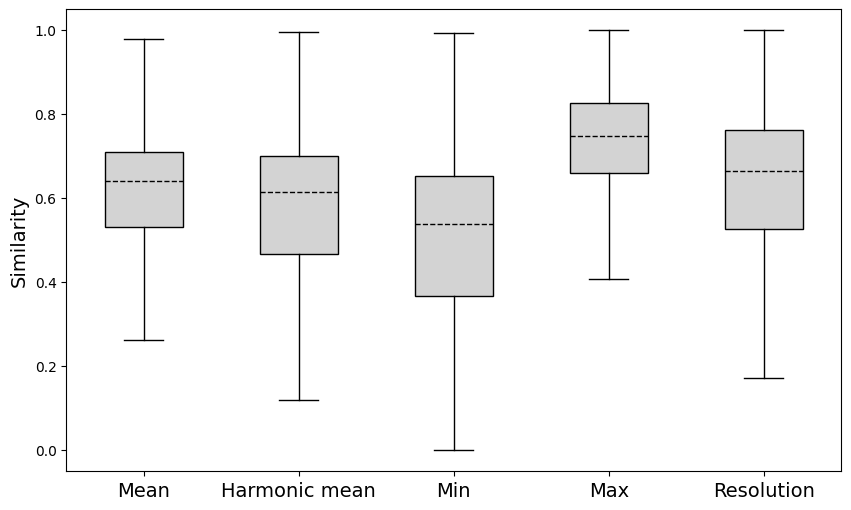

In [14]:
plt.figure(figsize=(10, 6))  # Set the figure size
plt.boxplot([df_gestalt['aggregate_mean_gestalt'], df_gestalt['aggregate_harmonic_mean_gestalt'], df_gestalt['aggregate_min_gestalt'], df_gestalt['aggregate_max_gestalt'], df_gestalt['solution_gestalt_sim']], 
            patch_artist=True,  # To fill the box with color
#             widths=0.5,  # Width of the box
            medianprops=dict(color='black', linestyle='--'),  # Color of the median line
            boxprops=dict(facecolor='lightgray', color='black'),  # Color of the box
            whiskerprops=dict(color='black'),  # Color of the whiskers
            capprops=dict(color='black'),  # Color of the caps
            showfliers=False)  # Properties of the outliers

plt.ylabel('Similarity', fontsize=14)
plt.xticks([1, 2, 3, 4, 5], ['Mean', 'Harmonic mean', 'Min', 'Max', 'Resolution'], fontsize=14)
# plt.title('Similarity between random candidates and parents \n using each aggregation function', fontsize=16)


# plt.savefig('figures/RQ3_sim_boxplots.png', dpi=300)  # Save the plot as a PNG file with higher resolution
plt.show()

#### What is the correlation between the variables?

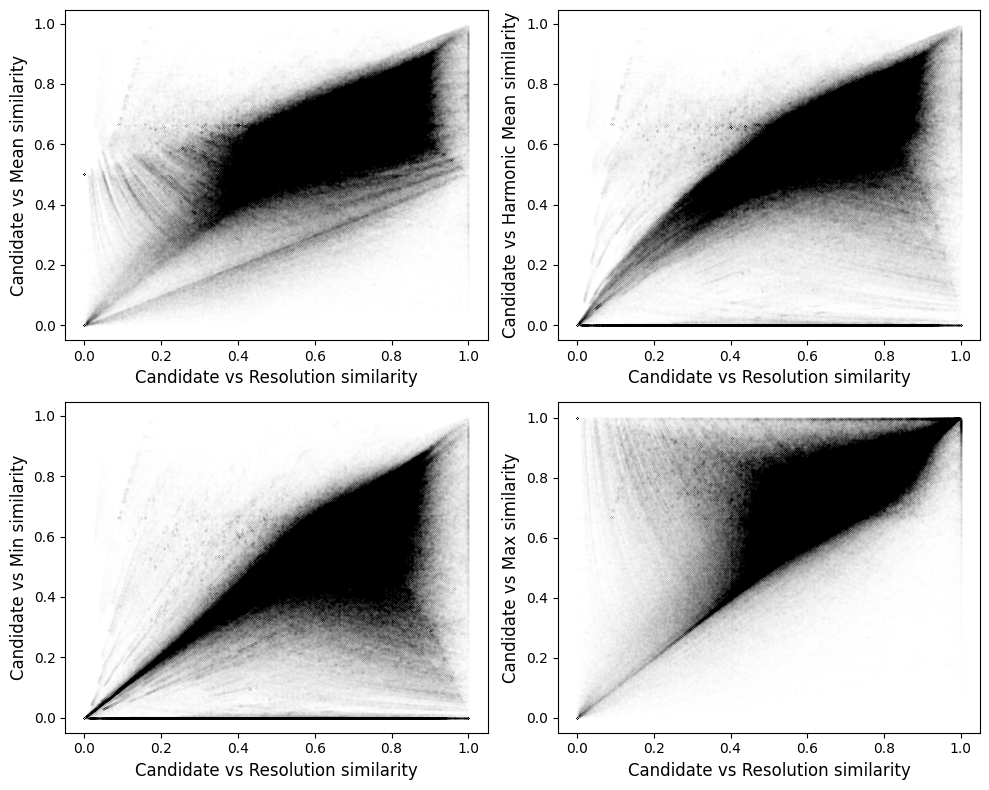

In [15]:
gray_palette = ['black']*4

fig, axs = plt.subplots(2, 2, figsize=(10, 8))

axs[0, 0].scatter(df_gestalt['solution_gestalt_sim'], df_gestalt['aggregate_mean_gestalt'], color=gray_palette[0], alpha=0.026, marker='.', s=0.01)
# axs[0, 0].set_title('Mean', fontsize=14)
axs[0, 0].set_xlabel('Candidate vs Resolution similarity', fontsize=12)
axs[0, 0].set_ylabel('Candidate vs Mean similarity', fontsize=12)

axs[0, 1].scatter(df_gestalt['solution_gestalt_sim'], df_gestalt['aggregate_harmonic_mean_gestalt'], color=gray_palette[1], alpha=0.026, marker='.', s=0.01)
# axs[0, 1].set_title('Harmonic Mean', fontsize=14)
axs[0, 1].set_xlabel('Candidate vs Resolution similarity', fontsize=12)
axs[0, 1].set_ylabel('Candidate vs Harmonic Mean similarity', fontsize=12)

axs[1, 0].scatter(df_gestalt['solution_gestalt_sim'], df_gestalt['aggregate_min_gestalt'], color=gray_palette[2], alpha=0.026, marker='.', s=0.01)
# axs[1, 0].set_title('Min', fontsize=14)
axs[1, 0].set_xlabel('Candidate vs Resolution similarity', fontsize=12)
axs[1, 0].set_ylabel('Candidate vs Min similarity', fontsize=12)

axs[1, 1].scatter(df_gestalt['solution_gestalt_sim'], df_gestalt['aggregate_max_gestalt'], color=gray_palette[3], alpha=0.026, marker='.', s=0.01)
# axs[1, 1].set_title('Max', fontsize=14)
axs[1, 1].set_xlabel('Candidate vs Resolution similarity', fontsize=12)
axs[1, 1].set_ylabel('Candidate vs Max similarity', fontsize=12)

plt.tight_layout()

# plt.suptitle('Scatter plot of candidate/resolution and candidate/parents similarity \n using different aggregation functions', y=1.02, fontsize=16)
# plt.savefig('figures/RQ3_scatter.png', dpi=300)
plt.show()

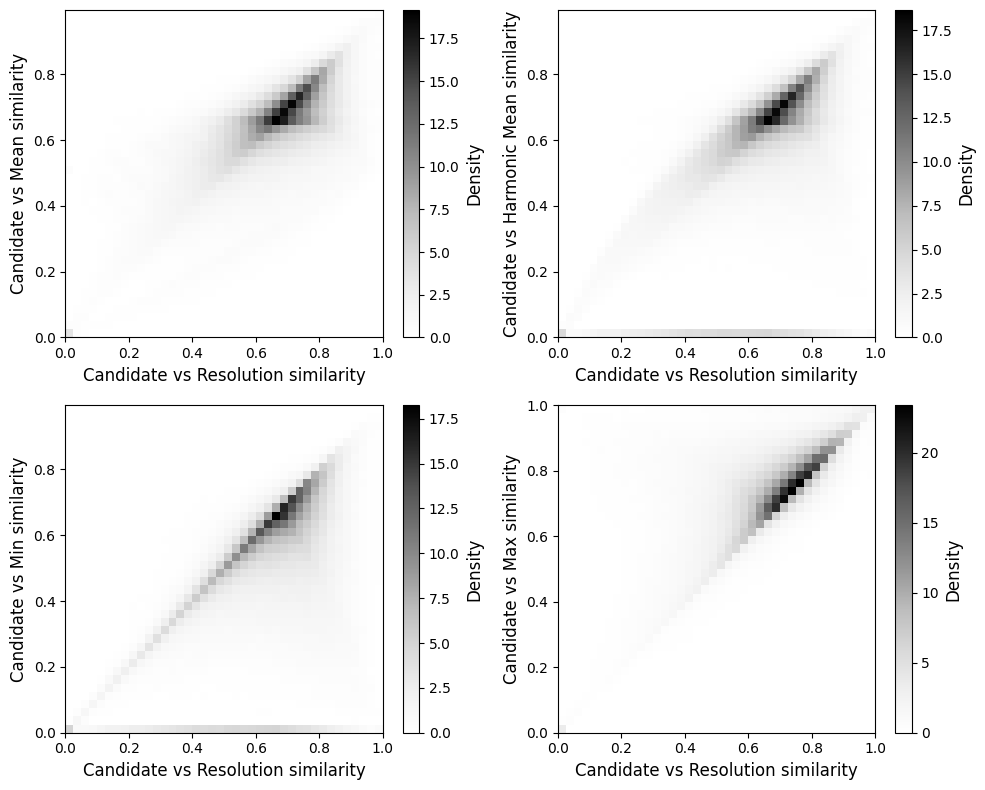

In [16]:
gray_palette = ['black']*4

fig, axs = plt.subplots(2, 2, figsize=(10, 8))
bins = [40, 40] 

h1 = axs[0,0].hist2d(df_gestalt['solution_gestalt_sim'], df_gestalt['aggregate_mean_gestalt'], bins=bins, cmap='Greys', density=True)
axs[0, 0].set_xlabel('Candidate vs Resolution similarity', fontsize=12)
axs[0, 0].set_ylabel('Candidate vs Mean similarity', fontsize=12)
cbar1 = fig.colorbar(h1[3], ax=axs[0,0])
cbar1.set_label('Density', fontsize=12)

h2 = axs[0,1].hist2d(df_gestalt['solution_gestalt_sim'], df_gestalt['aggregate_harmonic_mean_gestalt'], bins=bins, cmap='Greys', density=True)
axs[0, 1].set_xlabel('Candidate vs Resolution similarity', fontsize=12)
axs[0, 1].set_ylabel('Candidate vs Harmonic Mean similarity', fontsize=12)
cbar2 = fig.colorbar(h2[3], ax=axs[0,1])
cbar2.set_label('Density', fontsize=12)

h3 = axs[1,0].hist2d(df_gestalt['solution_gestalt_sim'], df_gestalt['aggregate_min_gestalt'], bins=bins, cmap='Greys', density=True)
axs[1, 0].set_xlabel('Candidate vs Resolution similarity', fontsize=12)
axs[1, 0].set_ylabel('Candidate vs Min similarity', fontsize=12)
cbar3 = fig.colorbar(h3[3], ax=axs[1,0])
cbar3.set_label('Density', fontsize=12)

h4 = axs[1,1].hist2d(df_gestalt['solution_gestalt_sim'], df_gestalt['aggregate_max_gestalt'], bins=bins, cmap='Greys', density=True)
axs[1, 1].set_xlabel('Candidate vs Resolution similarity', fontsize=12)
axs[1, 1].set_ylabel('Candidate vs Max similarity', fontsize=12)
cbar4 = fig.colorbar(h4[3], ax=axs[1,1])
cbar4.set_label('Density', fontsize=12)

plt.tight_layout()

# plt.suptitle('Scatter plot of candidate/resolution and candidate/parents similarity \n using different aggregation functions', y=1.02, fontsize=16)
plt.savefig('figures/RQ3_correlation.png', dpi=300)
plt.show()

In [17]:
df_gestalt.corr(method='spearman')

,aggregate_mean_gestalt,aggregate_harmonic_mean_gestalt,aggregate_min_gestalt,aggregate_max_gestalt,solution_gestalt_sim
aggregate_mean_gestalt,1.000000,0.973177,0.907683,0.616125,0.597691
aggregate_harmonic_mean_gestalt,0.973177,1.000000,0.971710,0.434275,0.531042
aggregate_min_gestalt,0.907683,0.971710,1.000000,0.270131,0.466827
aggregate_max_gestalt,0.616125,0.434275,0.270131,1.000000,0.564463
solution_gestalt_sim,0.597691,0.531042,0.466827,0.564463,1.000000


In [18]:
res = stats.spearmanr(df_gestalt['solution_gestalt_sim'], df_gestalt['aggregate_mean_gestalt'])
res

SignificanceResult(statistic=0.5976909446287134, pvalue=0.0)

In [19]:
res = stats.spearmanr(df_gestalt['solution_gestalt_sim'], df_gestalt['aggregate_harmonic_mean_gestalt'])
res

SignificanceResult(statistic=0.5310420917419267, pvalue=0.0)

In [20]:
res = stats.spearmanr(df_gestalt['solution_gestalt_sim'], df_gestalt['aggregate_min_gestalt'])
res

SignificanceResult(statistic=0.4668266060652887, pvalue=0.0)

In [21]:
res = stats.spearmanr(df_gestalt['solution_gestalt_sim'], df_gestalt['aggregate_max_gestalt'])
res

SignificanceResult(statistic=0.5644625980272554, pvalue=0.0)

### Per chunk analysis

Questions

- What is the distribution of the descriptive statistics when considering each chunk separately?
- What is the correlation of the variables per chunk?

#### What is the distribution of the descriptive statistics when considering each chunk separately?

In [22]:
df_stats = df_results.groupby('chunk_id').describe().unstack()

In [23]:
print(df_stats['aggregate_mean_gestalt']['mean'].describe())
print(df_stats['aggregate_mean_gestalt']['std'].describe())
print(df_stats['aggregate_mean_gestalt']['50%'].describe())

count    9998.000000
mean        0.606774
std         0.122327
min         0.299471
25%         0.559883
50%         0.644060
75%         0.696228
max         0.806674
dtype: float64
count    9998.000000
mean        0.130964
std         0.065102
min         0.000000
25%         0.090729
50%         0.115030
75%         0.155821
max         0.436002
dtype: float64
count    9998.000000
mean        0.628692
std         0.127480
min         0.308092
25%         0.586118
50%         0.667996
75%         0.715150
max         0.951248
dtype: float64


In [24]:
print(df_stats['aggregate_harmonic_mean_gestalt']['mean'].describe())
print(df_stats['aggregate_harmonic_mean_gestalt']['std'].describe())
print(df_stats['aggregate_harmonic_mean_gestalt']['50%'].describe())

count    9998.000000
mean        0.528484
std         0.242799
min         0.000000
25%         0.503890
50%         0.623267
75%         0.689868
max         0.806440
dtype: float64
count    9998.000000
mean        0.113354
std         0.076804
min         0.000000
25%         0.070219
50%         0.105647
75%         0.150438
max         0.442077
dtype: float64
count    9998.000000
mean        0.548468
std         0.252417
min         0.000000
25%         0.520465
50%         0.657246
75%         0.709104
max         0.950245
dtype: float64


In [25]:
print(df_stats['aggregate_min_gestalt']['mean'].describe())
print(df_stats['aggregate_min_gestalt']['std'].describe())
print(df_stats['aggregate_min_gestalt']['50%'].describe())

count    9998.000000
mean        0.472362
std         0.230832
min         0.000000
25%         0.399877
50%         0.544237
75%         0.643568
max         0.795571
dtype: float64
count    9998.000000
mean        0.111685
std         0.068401
min         0.000000
25%         0.083607
50%         0.106226
75%         0.144712
max         0.422447
dtype: float64
count    9998.000000
mean        0.486489
std         0.240164
min         0.000000
25%         0.400000
50%         0.573997
75%         0.661777
max         0.920354
dtype: float64


In [26]:
print(df_stats['aggregate_max_gestalt']['mean'].describe())
print(df_stats['aggregate_max_gestalt']['std'].describe())
print(df_stats['aggregate_max_gestalt']['50%'].describe())

count    9998.000000
mean        0.741186
std         0.055385
min         0.555547
25%         0.714483
50%         0.738638
75%         0.761794
max         0.998824
dtype: float64
count    9998.000000
mean        0.175949
std         0.073356
min         0.000000
25%         0.128640
50%         0.158904
75%         0.203554
max         0.532003
dtype: float64
count    9998.000000
mean        0.761442
std         0.057320
min         0.597701
25%         0.729236
50%         0.754611
75%         0.786774
max         0.998824
dtype: float64


In [27]:
print(df_stats['solution_gestalt_sim']['mean'].describe())
print(df_stats['solution_gestalt_sim']['std'].describe())
print(df_stats['solution_gestalt_sim']['50%'].describe())

count    9998.000000
mean        0.641503
std         0.108256
min         0.040472
25%         0.607477
50%         0.667833
75%         0.708933
max         0.963415
dtype: float64
count    9998.000000
mean        0.190650
std         0.093204
min         0.000672
25%         0.131533
50%         0.168382
75%         0.213154
max         0.707107
dtype: float64
count    9998.000000
mean        0.660843
std         0.121681
min         0.018729
25%         0.630140
50%         0.693878
75%         0.734142
max         0.963415
dtype: float64


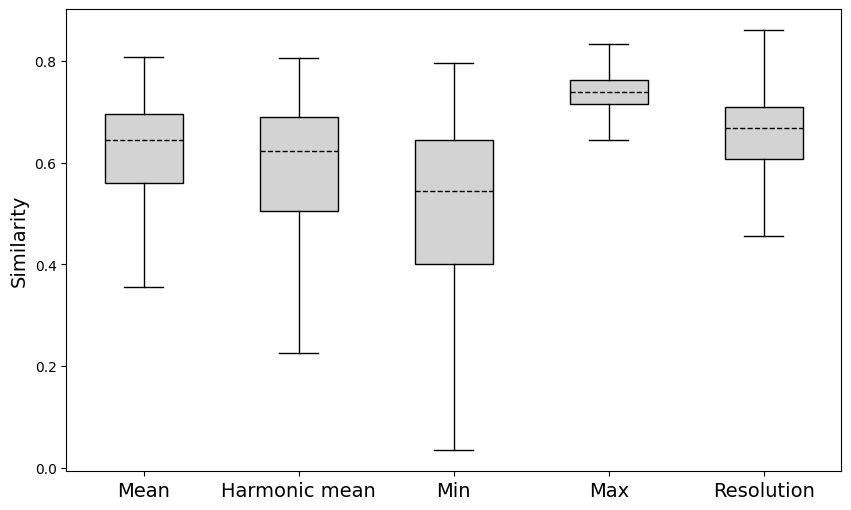

In [28]:
plt.figure(figsize=(10, 6))  
plt.boxplot([df_stats['aggregate_mean_gestalt']['mean'], df_stats['aggregate_harmonic_mean_gestalt']['mean'], df_stats['aggregate_min_gestalt']['mean'], df_stats['aggregate_max_gestalt']['mean'], df_stats['solution_gestalt_sim']['mean']], 
            patch_artist=True,  # To fill the box with color
#             widths=0.5,  # Width of the box
            medianprops=dict(color='black', linestyle='--'),  # Color of the median line
            boxprops=dict(facecolor='lightgray', color='black'),  # Color of the box
            whiskerprops=dict(color='black'),  # Color of the whiskers
            capprops=dict(color='black'),  # Color of the caps
            showfliers=False)  # Properties of the outliers


plt.ylabel('Similarity', fontsize=14)
plt.xticks([1, 2, 3, 4, 5], ['Mean', 'Harmonic mean', 'Min', 'Max', 'Resolution'], fontsize=14)


plt.savefig('figures/RQ3_boxplot.png', dpi=300)  # Save the plot as a PNG file with higher resolution
# plt.suptitle("Distribution of the candidates' mean similarities per chunk")
plt.show() 

#### What is the correlation of the variables per chunk?

In [29]:
columns = ['chunk_id', 'parents_mean_resolution_corr', 'parents_mean_resolution_p',
           'parents_harmonic_resolution_corr', 'parents_harmonic_resolution_p',
           'parents_min_resolution_corr', 'parents_min_resolution_p',
           'parents_max_resolution_corr', 'parents_max_resolution_p']
data = []           
for chunk_id in df_results['chunk_id'].unique():
    candidates = df_results[df_results['chunk_id']==chunk_id]
    mean_resolution_corr, mean_resolution_p = stats.spearmanr(candidates['aggregate_mean_gestalt'],candidates['solution_gestalt_sim'])
    harmonic_resolution_corr, harmonic_resolution_p = stats.spearmanr(candidates['aggregate_harmonic_mean_gestalt'],candidates['solution_gestalt_sim'])
    min_resolution_corr, min_resolution_p = stats.spearmanr(candidates['aggregate_min_gestalt'],candidates['solution_gestalt_sim'])
    max_resolution_corr, max_resolution_p = stats.spearmanr(candidates['aggregate_max_gestalt'],candidates['solution_gestalt_sim'])
    
    data.append([chunk_id, mean_resolution_corr, mean_resolution_p, harmonic_resolution_corr, harmonic_resolution_p,
                 min_resolution_corr, min_resolution_p, max_resolution_corr, max_resolution_p])

/tmp/ipykernel_20939/370809651.py:9: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  harmonic_resolution_corr, harmonic_resolution_p = stats.spearmanr(candidates['aggregate_harmonic_mean_gestalt'],candidates['solution_gestalt_sim'])
/tmp/ipykernel_20939/370809651.py:10: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  min_resolution_corr, min_resolution_p = stats.spearmanr(candidates['aggregate_min_gestalt'],candidates['solution_gestalt_sim'])
/tmp/ipykernel_20939/370809651.py:8: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  mean_resolution_corr, mean_resolution_p = stats.spearmanr(candidates['aggregate_mean_gestalt'],candidates['solution_gestalt_sim'])
/tmp/ipykernel_20939/370809651.py:11: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  max_resolution_corr, max_resolution_p = stats.spearmanr(can

In [30]:
df_corr = pd.DataFrame(data, columns=columns)
df_corr

,chunk_id,parents_mean_resolution_corr,parents_mean_resolution_p,parents_harmonic_resolution_corr,parents_harmonic_resolution_p,parents_min_resolution_corr,parents_min_resolution_p,parents_max_resolution_corr,parents_max_resolution_p
0,964152,0.556914,1.083528e-12,-0.393561,1.643152e-06,-0.564736,4.449203e-13,0.693508,3.020195e-21
1,783308,0.982248,0.000000e+00,0.982069,0.000000e+00,0.972988,0.000000e+00,0.978790,0.000000e+00
2,825766,0.618330,1.662218e-03,0.866655,8.916435e-08,0.826607,1.167045e-06,0.215546,3.232745e-01
3,1166841,0.460164,1.488592e-53,0.472997,6.972451e-57,0.475830,1.227312e-57,0.373318,2.003855e-34
4,1137463,0.474211,3.702933e-09,0.279550,8.598109e-04,0.036136,6.727831e-01,0.621052,3.456400e-16
...,...,...,...,...,...,...,...,...,...
9993,1164578,0.737135,4.550487e-172,0.756368,3.689213e-186,0.584346,1.279800e-92,0.642680,1.349578e-117
9994,804284,-0.746352,8.834658e-02,NaN,NaN,NaN,NaN,-0.746352,8.834658e-02
9995,1136584,0.728719,2.753834e-166,0.687762,5.508062e-141,0.539101,1.799354e-76,0.760830,1.283493e-189
9996,777957,0.945611,1.286653e-03,0.981981,8.290963e-05,0.981981,8.290963e-05,0.945611,1.286653e-03


In [31]:
df_corr.describe()

,chunk_id,parents_mean_resolution_corr,parents_mean_resolution_p,parents_harmonic_resolution_corr,parents_harmonic_resolution_p,parents_min_resolution_corr,parents_min_resolution_p,parents_max_resolution_corr,parents_max_resolution_p
count,9.998000e+03,9994.000000,9.497000e+03,8535.000000,8.535000e+03,8535.000000,8.535000e+03,9994.000000,9.497000e+03
mean,1.097219e+06,0.488886,6.213026e-02,0.556157,5.892663e-02,0.473887,7.398943e-02,0.460062,6.810662e-02
std,2.121029e+05,0.533769,1.821241e-01,0.401579,1.719298e-01,0.448228,1.948137e-01,0.553192,1.905884e-01
min,7.766620e+05,-1.000000,0.000000e+00,-0.958833,0.000000e+00,-0.958914,0.000000e+00,-1.000000,0.000000e+00
25%,9.395962e+05,0.339949,2.856209e-146,0.348837,4.499174e-109,0.204532,9.134046e-87,0.264224,2.004115e-156
50%,1.064852e+06,0.662185,7.888924e-22,0.660091,3.458186e-19,0.578685,1.974916e-16,0.667554,3.144998e-19
75%,1.258395e+06,0.871353,9.554679e-04,0.882919,4.541492e-04,0.852585,2.773732e-03,0.857143,1.812441e-03
max,1.658666e+06,1.000000,1.000000e+00,1.000000,1.000000e+00,1.000000,1.000000e+00,1.000000,1.000000e+00


In [32]:
df_corr_cleaned = df_corr.dropna(subset=['parents_mean_resolution_corr', 'parents_harmonic_resolution_corr',
                                        'parents_min_resolution_corr', 'parents_max_resolution_corr'])
print(f"Number of chunks in the dataset: {len(df_corr)}")
print(f"Number of chunks where the correlation is not null: {len(df_corr_cleaned)}")

Number of chunks in the dataset: 9998
Number of chunks where the correlation is not null: 8535


In [33]:
df_corr_signif_mean = df_corr[df_corr['parents_mean_resolution_p']<0.05]
df_corr_signif_harmonic = df_corr[df_corr['parents_harmonic_resolution_p']<0.05]
df_corr_signif_min = df_corr[df_corr['parents_min_resolution_p']<0.05]
df_corr_signif_max = df_corr[df_corr['parents_max_resolution_p']<0.05]
df_corr_signif = df_corr[(df_corr['parents_mean_resolution_p']<0.05) & (df_corr['parents_harmonic_resolution_p']<0.05)
                        & (df_corr['parents_min_resolution_p']<0.05) & (df_corr['parents_max_resolution_p']<0.05)]
print(f"Number of chunks where the correlation resolution/mean parents is significant (alpha < 0.05): {len(df_corr_signif_mean)}")
print(f"Number of chunks where the correlation resolution/harmonic mean parents is significant (alpha < 0.05): {len(df_corr_signif_harmonic)}")
print(f"Number of chunks where the correlation resolution/min parents is significant (alpha < 0.05): {len(df_corr_signif_min)}")
print(f"Number of chunks where the correlation resolution/max parents is significant (alpha < 0.05): {len(df_corr_signif_max)}")
print(f"Number of chunks where the all correlations are significant (alpha < 0.05): {len(df_corr_signif)}")

Number of chunks where the correlation resolution/mean parents is significant (alpha < 0.05): 7968
Number of chunks where the correlation resolution/harmonic mean parents is significant (alpha < 0.05): 7190
Number of chunks where the correlation resolution/min parents is significant (alpha < 0.05): 7001
Number of chunks where the correlation resolution/max parents is significant (alpha < 0.05): 7867
Number of chunks where the all correlations are significant (alpha < 0.05): 6138


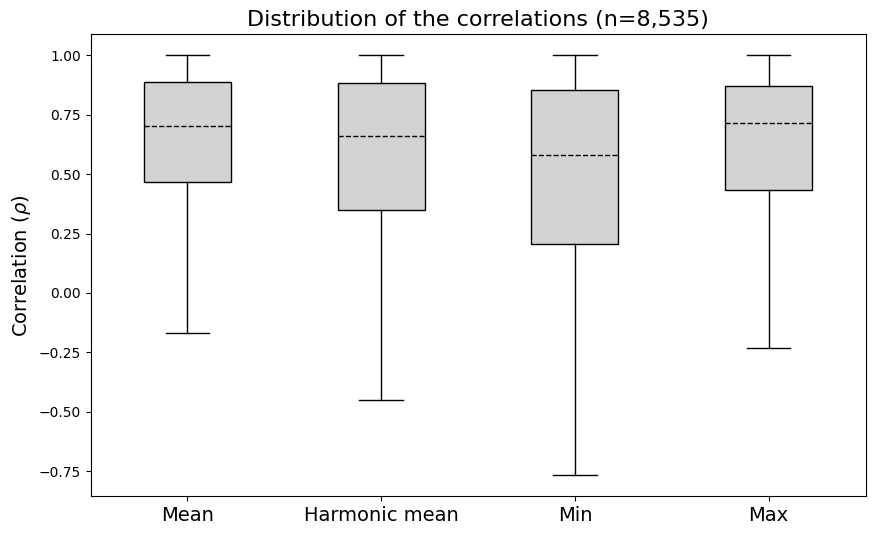

In [34]:
plt.figure(figsize=(10, 6))  
plt.boxplot([df_corr_cleaned['parents_mean_resolution_corr'], df_corr_cleaned['parents_harmonic_resolution_corr'],
            df_corr_cleaned['parents_min_resolution_corr'], df_corr_cleaned['parents_max_resolution_corr']], 
            patch_artist=True,  # To fill the box with color
#             widths=0.5,  # Width of the box
            medianprops=dict(color='black', linestyle='--'),  # Color of the median line
            boxprops=dict(facecolor='lightgray', color='black'),  # Color of the box
            whiskerprops=dict(color='black'),  # Color of the whiskers
            capprops=dict(color='black'),  # Color of the caps
            showfliers=False)  # Properties of the outliers

plt.ylabel('Correlation ($\\rho$)', fontsize=14)
plt.xticks([1, 2, 3, 4], ['Mean', 'Harmonic mean', 'Min', 'Max'], fontsize=14)
plt.title(f"Distribution of the correlations (n={len(df_corr_cleaned):,})", fontsize=16)

# plt.savefig('figures/RQ2_boxplot.png', dpi=300)  # Save the plot as a PNG file with higher resolution
plt.show()  # Show the plot

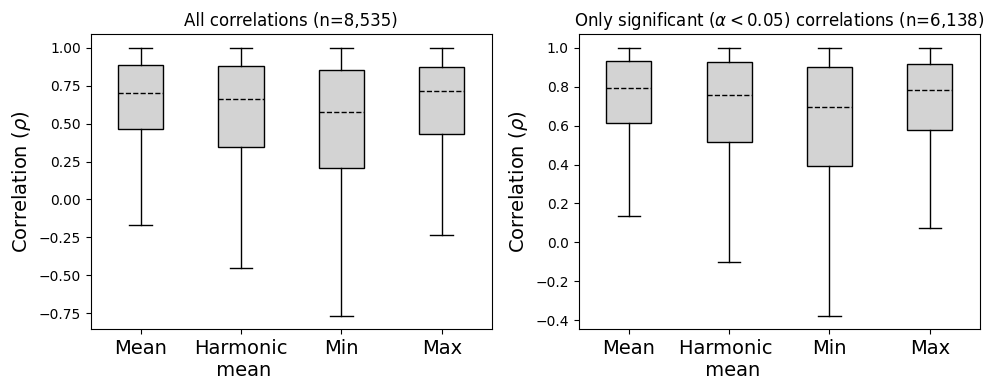

In [35]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
axs[0].boxplot([df_corr_cleaned['parents_mean_resolution_corr'], df_corr_cleaned['parents_harmonic_resolution_corr'],
            df_corr_cleaned['parents_min_resolution_corr'], df_corr_cleaned['parents_max_resolution_corr']],
            patch_artist=True,  # To fill the box with color
#             widths=0.5,  # Width of the box
            medianprops=dict(color='black', linestyle='--'),  # Color of the median line
            boxprops=dict(facecolor='lightgray', color='black'),  # Color of the box
            whiskerprops=dict(color='black'),  # Color of the whiskers
            capprops=dict(color='black'),  # Color of the caps
            showfliers=False)  
axs[0].set_title(f"All correlations (n={len(df_corr_cleaned):,})")
axs[0].set_ylabel('Correlation ($\\rho$)', fontsize=14)
axs[0].set_xticks([1, 2, 3, 4], ['Mean', 'Harmonic\n mean', 'Min', 'Max'], fontsize=14)


axs[1].boxplot([df_corr_signif['parents_mean_resolution_corr'], df_corr_signif['parents_harmonic_resolution_corr'],
            df_corr_signif['parents_min_resolution_corr'], df_corr_signif['parents_max_resolution_corr']],
            patch_artist=True,  # To fill the box with color
#             widths=0.5,  # Width of the box
            medianprops=dict(color='black', linestyle='--'),  # Color of the median line
            boxprops=dict(facecolor='lightgray', color='black'),  # Color of the box
            whiskerprops=dict(color='black'),  # Color of the whiskers
            capprops=dict(color='black'),  # Color of the caps
            showfliers=False)  
axs[1].set_title(f"Only significant ($\\alpha<0.05$) correlations (n={len(df_corr_signif):,})")
axs[1].set_ylabel('Correlation ($\\rho$)', fontsize=14)
axs[1].set_xticks([1, 2, 3, 4], ['Mean', 'Harmonic \n mean', 'Min', 'Max'], fontsize=14)
# plt.suptitle('Correlation between similarities candidate/parent and candidate/resolution')
plt.tight_layout()



plt.savefig('figures/RQ3_correlation_distribution.png', dpi=300)
plt.show()

In [36]:
df_corr_cleaned.describe()

,chunk_id,parents_mean_resolution_corr,parents_mean_resolution_p,parents_harmonic_resolution_corr,parents_harmonic_resolution_p,parents_min_resolution_corr,parents_min_resolution_p,parents_max_resolution_corr,parents_max_resolution_p
count,8.535000e+03,8535.000000,8.535000e+03,8535.000000,8.535000e+03,8535.000000,8.535000e+03,8535.000000,8.535000e+03
mean,1.099809e+06,0.619441,4.616769e-02,0.556157,5.892663e-02,0.473887,7.398943e-02,0.585690,5.281766e-02
std,2.146623e+05,0.353237,1.492836e-01,0.401579,1.719298e-01,0.448228,1.948137e-01,0.397675,1.612570e-01
min,7.766620e+05,-0.954278,0.000000e+00,-0.958833,0.000000e+00,-0.958914,0.000000e+00,-0.962950,0.000000e+00
25%,9.397185e+05,0.465448,3.059219e-149,0.348837,4.499174e-109,0.204532,9.134046e-87,0.431045,1.096077e-159
50%,1.065600e+06,0.702731,5.356548e-24,0.660091,3.458186e-19,0.578685,1.974916e-16,0.714056,1.858648e-21
75%,1.272505e+06,0.888022,2.130547e-04,0.882919,4.541492e-04,0.852585,2.773732e-03,0.872567,3.636409e-04
max,1.658666e+06,1.000000,1.000000e+00,1.000000,1.000000e+00,1.000000,1.000000e+00,1.000000,1.000000e+00


In [37]:
df_corr_signif.describe().apply(lambda s: s.apply('{0:.5f}'.format))

,chunk_id,parents_mean_resolution_corr,parents_mean_resolution_p,parents_harmonic_resolution_corr,parents_harmonic_resolution_p,parents_min_resolution_corr,parents_min_resolution_p,parents_max_resolution_corr,parents_max_resolution_p
count,6138.00000,6138.00000,6138.00000,6138.00000,6138.00000,6138.00000,6138.00000,6138.00000,6138.00000
mean,1107413.70626,0.69556,0.00043,0.62968,0.00053,0.55540,0.00099,0.65967,0.00078
std,217048.79331,0.34850,0.00294,0.40703,0.00334,0.45237,0.00486,0.39032,0.00423
min,776662.00000,-0.95428,0.00000,-0.95883,0.00000,-0.95891,0.00000,-0.96295,0.00000
25%,942288.75000,0.61286,0.00000,0.51696,0.00000,0.39036,0.00000,0.57788,0.00000
50%,1070026.50000,0.79058,0.00000,0.75519,0.00000,0.69532,0.00000,0.78280,0.00000
75%,1297386.50000,0.93032,0.00000,0.92799,0.00000,0.90267,0.00000,0.91437,0.00000
max,1658666.00000,1.00000,0.04810,1.00000,0.04895,1.00000,0.04983,1.00000,0.04997
